In [ ]:
# Loading libraries and mounting drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
# Reading and displaying data
data = pd.read_csv('/content/drive/MyDrive/new_train_EGN5442.csv')
data.head()

,Unnamed: 0,y,x2,x3,x5,x9,x10,x11,x12,x13,...,x23,x24,x25,x26,x28,x29,x30,x31,x4,x6
0,0,1,#54359,Female,50,5,5,5,4,3,...,21,12.0,D_C,Bt,1,(192&&),NaN,2.380952,4,50
1,1,1,#84649,Female,44,1,1,1,1,3,...,0,0.0,L_C,Bt,1,(1034&&),NaN,inf,4,44
2,2,0,#59015,Female,72,3,1,5,5,3,...,0,8.0,L_C,Bt,3,(1452&&),NaN,inf,4,72
3,3,0,#99990,Female,38,1,3,1,3,5,...,0,0.0,L_C,PT,3,(916&&),NaN,inf,4,38
4,4,1,#83569,Male,37,5,5,5,5,2,...,0,0.0,L_C,Bt,1,(390&&),NaN,inf,4,37


In [ ]:
# Examining data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104722 entries, 0 to 104721
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  104722 non-null  int64  
 1   y           104722 non-null  int64  
 2   x2          104722 non-null  object 
 3   x3          104722 non-null  object 
 4   x5          104722 non-null  int64  
 5   x9          104722 non-null  int64  
 6   x10         104722 non-null  int64  
 7   x11         104722 non-null  int64  
 8   x12         104722 non-null  int64  
 9   x13         104722 non-null  int64  
 10  x14         104722 non-null  object 
 11  x15         104722 non-null  int64  
 12  x16         104722 non-null  int64  
 13  x17         104722 non-null  int64  
 14  x18         104722 non-null  int64  
 15  x19         104722 non-null  int64  
 16  x20         104722 non-null  int64  
 17  x21         104722 non-null  int64  
 18  x22         104722 non-null  int64  
 19  x2

In [ ]:
# Trying to find string and datetime columns
print(data[['x29', 'x26', 'x25', 'x14', 'x3', 'x2']]) # All object type cols, we see that x3 is a string col

# Converting x3 column to numeric
data.x3 = data.apply(lambda row: 1 if row.x3 == 'Male' else 0, axis = 1)

# Getting rid of any letters/string variables in number columns
def get_nums(entry):
    if isinstance(entry, str):
        digits = ''.join(ch for ch in entry if ch.isdigit())
        return int(digits) if digits != '' else None
    return None

# Getting rid of other symbols in string columns
def get_chars(entry):
    if isinstance(entry, str):
        chars = ''.join(ch for ch in entry if ch.isalpha())
        return chars
    return None

# Converting all columns who were listed above
data['x29'] = data['x29'].apply(get_nums)
data['x2']  = data['x2'].apply(get_nums)
data['x25'] = data['x25'].apply(get_chars)


# Seeing changes
print(data[['x29', 'x26', 'x25', 'x14', 'x3', 'x2']])

             x29 x26  x25 x14      x3      x2
0        (192&&)  Bt  D_C   5  Female  #54359
1       (1034&&)  Bt  L_C   3  Female  #84649
2       (1452&&)  Bt  L_C   2  Female  #59015
3        (916&&)  PT  L_C   1  Female  #99990
4        (390&&)  Bt  L_C   5    Male  #83569
...          ...  ..  ...  ..     ...     ...
104717  (1371&&)  Bt  L_C   5    Male  #30483
104718  (1703&&)  Bt  L_C   2  Female  #23530
104719   (562&&)  PT  L_C   3    Male  #88477
104720   (315&&)  PT  L_C   2    Male  #17164
104721   (377&&)  Bt  L_C   5  Female  #93814

[104722 rows x 6 columns]
         x29 x26 x25 x14  x3     x2
0        192  Bt  DC   5   0  54359
1       1034  Bt  LC   3   0  84649
2       1452  Bt  LC   2   0  59015
3        916  PT  LC   1   0  99990
4        390  Bt  LC   5   1  83569
...      ...  ..  ..  ..  ..    ...
104717  1371  Bt  LC   5   1  30483
104718  1703  Bt  LC   2   0  23530
104719   562  PT  LC   3   1  88477
104720   315  PT  LC   2   1  17164
104721   377  Bt  LC   5 

In [ ]:
# Dealing with missing values
# x30 has 0 values
data = data.drop(columns = ['x30'])
data = data.dropna() # dropping all na vals
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104410 entries, 0 to 104721
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  104410 non-null  int64  
 1   y           104410 non-null  int64  
 2   x2          104410 non-null  int64  
 3   x3          104410 non-null  int64  
 4   x5          104410 non-null  int64  
 5   x9          104410 non-null  int64  
 6   x10         104410 non-null  int64  
 7   x11         104410 non-null  int64  
 8   x12         104410 non-null  int64  
 9   x13         104410 non-null  int64  
 10  x14         104410 non-null  object 
 11  x15         104410 non-null  int64  
 12  x16         104410 non-null  int64  
 13  x17         104410 non-null  int64  
 14  x18         104410 non-null  int64  
 15  x19         104410 non-null  int64  
 16  x20         104410 non-null  int64  
 17  x21         104410 non-null  int64  
 18  x22         104410 non-null  int64  
 19  x23    

In [ ]:
# Dealing with duplicated
data.drop_duplicates(keep='first', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104410 entries, 0 to 104721
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  104410 non-null  int64  
 1   y           104410 non-null  int64  
 2   x2          104410 non-null  int64  
 3   x3          104410 non-null  int64  
 4   x5          104410 non-null  int64  
 5   x9          104410 non-null  int64  
 6   x10         104410 non-null  int64  
 7   x11         104410 non-null  int64  
 8   x12         104410 non-null  int64  
 9   x13         104410 non-null  int64  
 10  x14         104410 non-null  object 
 11  x15         104410 non-null  int64  
 12  x16         104410 non-null  int64  
 13  x17         104410 non-null  int64  
 14  x18         104410 non-null  int64  
 15  x19         104410 non-null  int64  
 16  x20         104410 non-null  int64  
 17  x21         104410 non-null  int64  
 18  x22         104410 non-null  int64  
 19  x23    

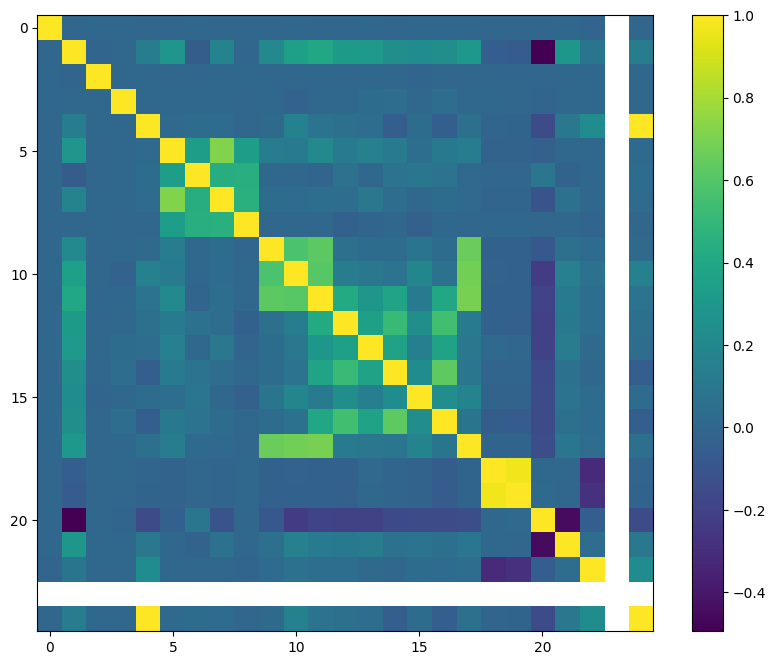

In [ ]:
# Finding highly correlated vals
# Need to find all whitespace and trailing characters and replace to get correct correlation matrix
obj_cols = data.select_dtypes(include='object').columns
for col in obj_cols:
    data[col] = data[col].str.strip()

data = data.replace(r'^\s*$', np.nan, regex=True)

corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()

# There seems to be low correlation, and maybe some high correlation within the first 10 columns with column 1
# However, nothing seems to be concerning enough to remove any columns

In [ ]:
# Categorical columns
# We see in previous codes that x25 and x26 have categories

# Getting unique vals for each
x25_vals = data.x25.unique()
print(x25_vals)

x26_vals = data.x26.unique()
print(x26_vals)

# Converting to dummy variables and dropping original columns (adding 2 columns in total)
dummies = pd.get_dummies(data[['x25', 'x26']], drop_first=True)
dummies = dummies.astype(int)

data = pd.concat([data, dummies], axis=1)
data = data.drop(columns = ['x26', 'x25'])
data.head()

['DC' 'LC']
['Bt' 'PT']


,Unnamed: 0,y,x2,x3,x5,x9,x10,x11,x12,x13,...,x22,x23,x24,x28,x29,x31,x4,x6,x25_LC,x26_PT
0,0,1,54359,0,50,5,5,5,4,3,...,3,21,12.0,1,192,2.380952,4,50,0,0
1,1,1,84649,0,44,1,1,1,1,3,...,2,0,0.0,1,1034,inf,4,44,1,0
2,2,0,59015,0,72,3,1,5,5,3,...,2,0,8.0,3,1452,inf,4,72,1,0
3,3,0,99990,0,38,1,3,1,3,5,...,5,0,0.0,3,916,inf,4,38,1,1
4,4,1,83569,1,37,5,5,5,5,2,...,5,0,0.0,1,390,inf,4,37,1,0


In [ ]:
data.x31

,x31
0,2.380952
1,inf
2,inf
3,inf
4,inf
...,...
104717,0.385714
104718,10.333333
104719,2.812500
104720,inf


In [ ]:
# We can see in previous code that x31 has continuous entries (inf)
data['x31_Bins'] = pd.cut(data['x31'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, np.inf], labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], include_lowest = True)
data = data.drop(columns = 'x31')
data.head()

,Unnamed: 0,y,x2,x3,x5,x9,x10,x11,x12,x13,...,x22,x23,x24,x28,x29,x4,x6,x25_LC,x26_PT,x31_Bins
0,0,1,54359,0,50,5,5,5,4,3,...,3,21,12.0,1,192,4,50,0,0,1
1,1,1,84649,0,44,1,1,1,1,3,...,2,0,0.0,1,1034,4,44,1,0,10
2,2,0,59015,0,72,3,1,5,5,3,...,2,0,8.0,3,1452,4,72,1,0,10
3,3,0,99990,0,38,1,3,1,3,5,...,5,0,0.0,3,916,4,38,1,1,10
4,4,1,83569,1,37,5,5,5,5,2,...,5,0,0.0,1,390,4,37,1,0,10


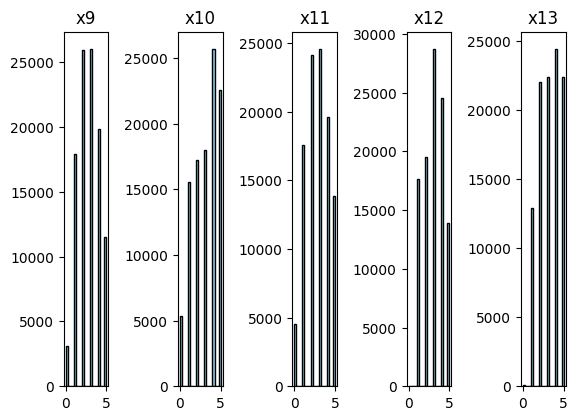

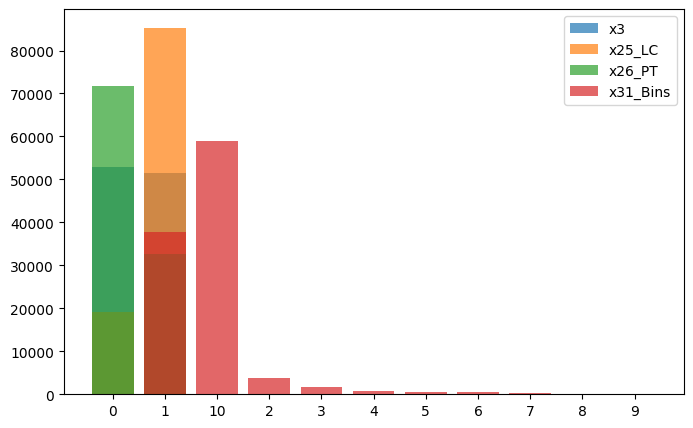

In [ ]:
# Visualizations

# Distribution of numerical columns
numeric_cols = data.select_dtypes(include='number').columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[5:10], 1): # Showing all of them would be too small to see
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    plt.hist(data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

# Bar plots for categorical columns

cat_cols = ['x3', 'x25_LC', 'x26_PT', 'x31_Bins']  # add your binary columns here

plt.figure(figsize=(8, 5))
for col in cat_cols:
    counts = data[col].value_counts()
    plt.bar(counts.index.astype(str), counts.values, alpha=0.7, label=col)
plt.legend()
plt.show()

In [ ]:
# Exporting data
data.to_csv('cleaned_data_project3.csv')